In [2]:
%load_ext autoreload
%autoreload 2 


import pyarrow.parquet as pq
import pyarrow as pa
from datetime import timedelta
from collections import defaultdict
from pathlib import Path
import os
import sys
sys.path.append('../src') 
from helper import summarize_period, summarize_period_minutely, plot_data_availability, plot_sampling_time, plot_mean_magnitude

import re
import random
import math
import warnings
import logging
from typing import List, Dict, Tuple, Optional
import numpy as np
import pandas as pd
import pytz
import matplotlib.pyplot as plt

Processing 3si9xdvl from 2022-03-21 through 2022-03-28
Summarizing minutely data for 3si9xdvl from 2022-03-21 to 2022-03-28...

2022-03-21:
MISSING: Hour 00: missing
MISSING: Hour 01: missing
MISSING: Hour 02: missing
MISSING: Hour 03: missing
MISSING: Hour 04: missing
MISSING: Hour 05: missing
MISSING: Hour 06: missing
MISSING: Hour 07: missing
MISSING: Hour 08: missing
MISSING: Hour 09: missing
MISSING: Hour 10: missing
MISSING: Hour 11: missing
MISSING: Hour 12: missing
OK: Hour 13: 15 minutes, 4,367 total rows
OK: Hour 14: 60 minutes, 18,074 total rows
OK: Hour 15: 60 minutes, 18,079 total rows
OK: Hour 16: 60 minutes, 18,070 total rows
OK: Hour 17: 60 minutes, 18,081 total rows
OK: Hour 18: 21 minutes, 6,145 total rows
OK: Hour 19: 40 minutes, 11,758 total rows
OK: Hour 20: 60 minutes, 18,068 total rows
OK: Hour 21: 21 minutes, 6,560 total rows
MISSING: Hour 22: missing
MISSING: Hour 23: missing

2022-03-22:
MISSING: Hour 00: missing
OK: Hour 01: 51 minutes, 15,616 total rows
OK: 

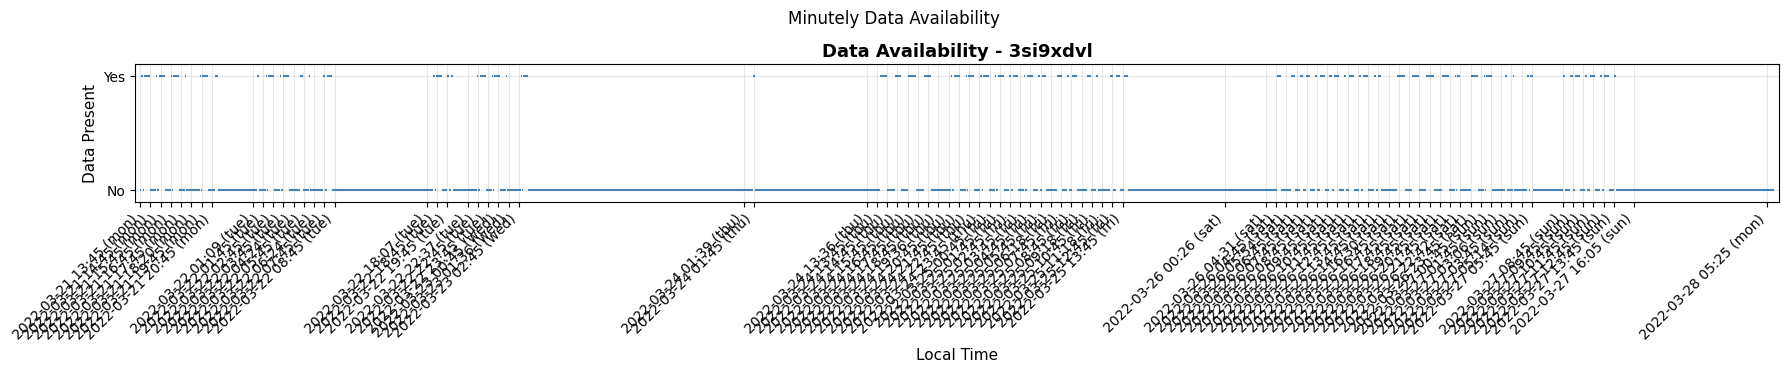

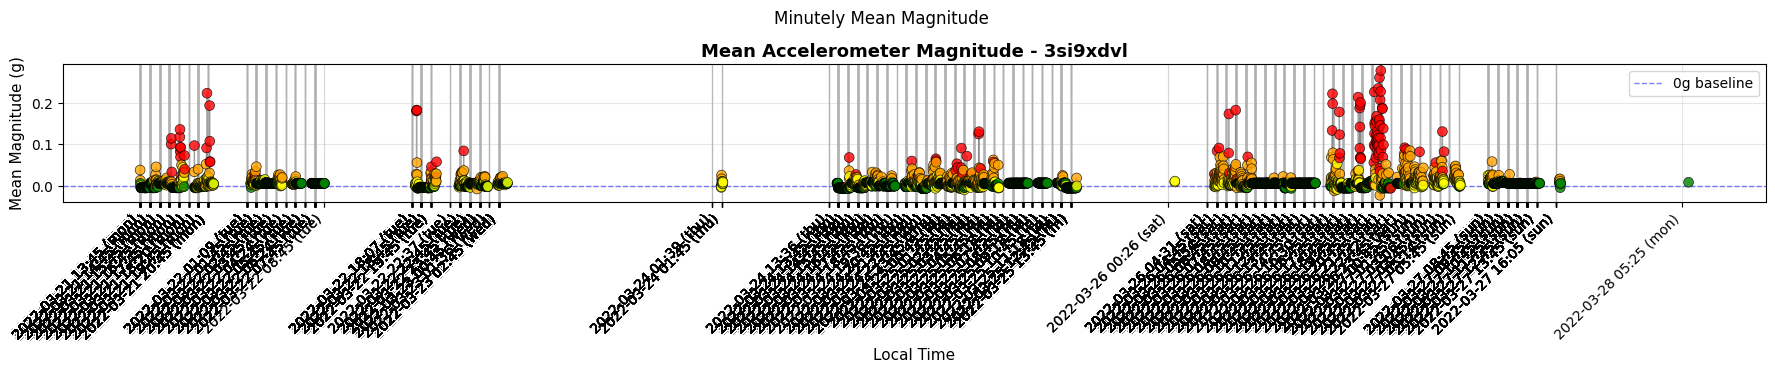

In [3]:
SUBJECT_ID = '3si9xdvl'
DATA_ROOT = Path('/n/home01/egraff/sample_imputation/data/raw')

accel_dir = DATA_ROOT / SUBJECT_ID / 'accelerometer'
if not accel_dir.exists():
    raise FileNotFoundError(f'No accelerometer directory found for {SUBJECT_ID} at {accel_dir}')

csv_files = sorted(accel_dir.glob('*.csv'))
if not csv_files:
    raise FileNotFoundError(f'No accelerometer CSV files found for {SUBJECT_ID} in {accel_dir}')

# Infer available date range from filenames (e.g., "2024-01-15 00_00_00+00_00.csv")
available_dates = set()
for fp in csv_files:
    date_token = fp.stem.split(' ')[0]
    try:
        available_dates.add(pd.to_datetime(date_token).date())
    except ValueError:
        continue

if not available_dates:
    raise ValueError('Unable to infer any dates from accelerometer filenames.')

start_date = pd.Timestamp(min(available_dates))
end_date = pd.Timestamp(max(available_dates))
print(f'Processing {SUBJECT_ID} from {start_date.date()} through {end_date.date()}')

summary_minutely = summarize_period_minutely(
    subject_id=SUBJECT_ID,
    start_date=start_date,
    end_date=end_date,
    base_path=str(DATA_ROOT),
    timezone='UTC'
)

if summary_minutely.empty:
    raise ValueError('summarize_period_minutely returned an empty DataFrame.')

fig_availability, ax_availability = plot_data_availability(
    summary_minutely,
    time_unit='hour',
    figsize=(18, 3.5)
)
fig_availability.suptitle('Minutely Data Availability', y=1.05)
plt.show()

fig_mean, ax_mean = plot_mean_magnitude(
    summary_minutely,
    time_unit='hour',
    figsize=(18, 3.5)
)
fig_mean.suptitle('Minutely Mean Magnitude', y=1.05)
plt.show()
